# XGBRegressor forecast Model for Household Electricity Consumption

Stands for "Extreme Gradient Boosting" and it is an implementation of the tree algorithm
of gradient enhancement. XGBoost is a supervised machine learning model.
It can also be used to predict time series.

In [1]:
import pandas as pd
import numpy as np

<h2> 01: Load Data</h2>

In [2]:
series = pd.read_csv('household_power_consumption_mod.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

C:\Users\Imad\AppData\Local\Temp\ipykernel_19840\4141381535.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('household_power_consumption_mod.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


<h3>Resample data evry hour</3>

In [3]:
series=series.resample('H').sum()

In [4]:
series.shape

(34589, 8)

<h3>03: Split data</h3>

In [31]:
day=26280
train, test = series.iloc[0:day,:], series.iloc[day+1:day+74,:]

In [32]:
train.shape

(26280, 8)

In [33]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
lookback = 7
X_train, Y_train = create_dataset(train.values, lookback)
X_test, Y_test = create_dataset(test.values, lookback)

<h3>04: Training the data by the model XGBregressor</h3>

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000,subsample=1, max_depth=6,learning_rate=0.200000012)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
testpred = model.predict(X_test)

In [37]:
Y_test=Y_test.reshape(-1,1)
testpred=testpred.reshape(-1,1)

<h3>05: Ploting the predect and actual data</h3>

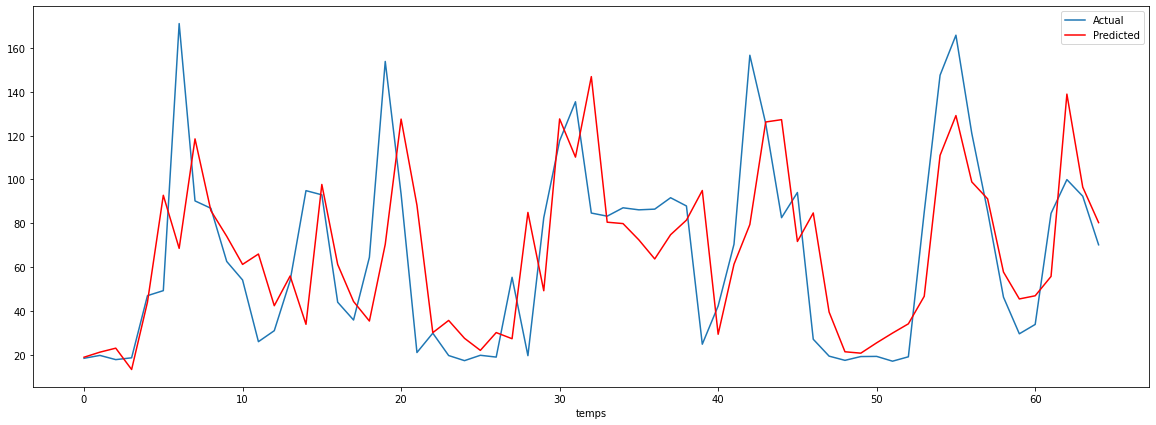

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(Y_test)
plt.plot(testpred, color='red')
plt.legend(['Actual','Predicted'])
plt.xlabel('temps')
plt.show()

<h3>06: Evaluat model by using MAE, RMSE and MSE</h3>

In [43]:
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [44]:
mae(Y_test,testpred)

23.35137506925143

In [38]:
import math
from sklearn.metrics import mean_squared_error
from math import sqrt
test_mse = mean_squared_error(Y_test, testpred)
rmse = sqrt(test_mse)
mse =mean_squared_error(Y_test,testpred )
print('RMSE: %f' % rmse)
print('MSE: %f' % mse)

RMSE: 32.956966
MSE: 1086.161595
